In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import itertools as it
from collections import Counter, defaultdict, deque
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Need the `dot` command from graphviz to visualize tree with `env.render()`
# -> install graphviz by running BOTH commands below:
# conda install graphviz
# pip install graphviz

# make sure `dot` is in the path
import os
os.environ['PATH'] +=':/home/fredcallaway/miniconda3/envs/mcrl/bin/'

# Mouselab-MDP Environment

We construct a Mouselab-MDP with a symmetric tree structure by specifying a branching structure
and a function `reward(depth) -> Distribution` that specifies the reward distribution for
the nodes at each depth. The ground truth for each environment is determined when the `MouselabEnv`
object is instantiated. We can keep the ground truth constant by specifying a `seed` value. Each
env will have a different ground truth, but if we call `envs = make_envs(n=10, seed=1)` multiple times,
`env[4]` will always have the same ground truth.

In [13]:
env = envs['increasing'][0]
env.init[1]

Cat

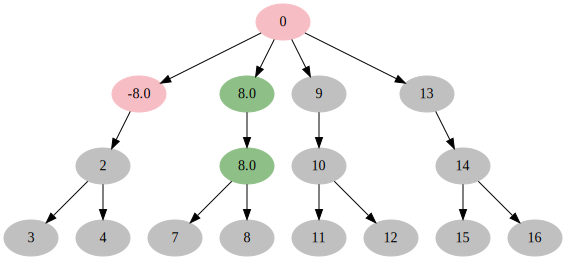

In [3]:
from mouselab import MouselabEnv
from distributions import Categorical, Normal
from toolz import get

def make_envs(cost=1.25, n=100, seed=None, variance_structure="constant_high"):
    if seed is not None:
        np.random.seed(seed)

    sigmas = get(variance_structure, {
        "constant_high": [0,20,20,20],
        "increasing": [0, 2, 4, 20],
        "decreasing": [0,20,10,5],
        "constant_low": [0,1,1,1],
    })
    
    def reward(depth):
        if depth > 0:
            return Normal(0, sigmas[depth]).to_discrete(6)
        return 0.
    
    branching = [4,1,2]
    envs = [MouselabEnv.new_symmetric(branching, reward, cost=cost)
            for _ in range(n)]
    
    return envs

env = make_envs(n=1, seed=17)[0]
env.reset()
for a in [1, 5, 6,]:
    env.step(a)
env.render()

In [10]:
structures = ["constant_high", "constant_low", "increasing", "decreasing"]
envs = {struct: make_envs(1.0, 500, 1, struct)
        for struct in structures}

import joblib
joblib.dump(envs, 'data/envs.pkl')

['data/envs.pkl']